# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Carlos Henrique Brito Malta Leão | Vinícius Alves de Faria Resende
### **Matrículas:** 202103xxxx | 2021039972

### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [2]:
# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

##**2. Data understanding (Entendimento dos dados)**


In [3]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';')

In [4]:
# Dada as colunas de interesse, selecionamos apenas as colunas que serão usadas no projeto
columns_of_interest = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

DF = raw_df.filter(columns_of_interest)

In [5]:
# Adiciona uma coluna com a média das notas de cada participante
DF['NU_NOTA_MEDIA'] = (DF['NU_NOTA_CN'] + DF['NU_NOTA_CH'] + DF['NU_NOTA_LC'] + DF['NU_NOTA_MT'] + DF['NU_NOTA_REDACAO']) / 5

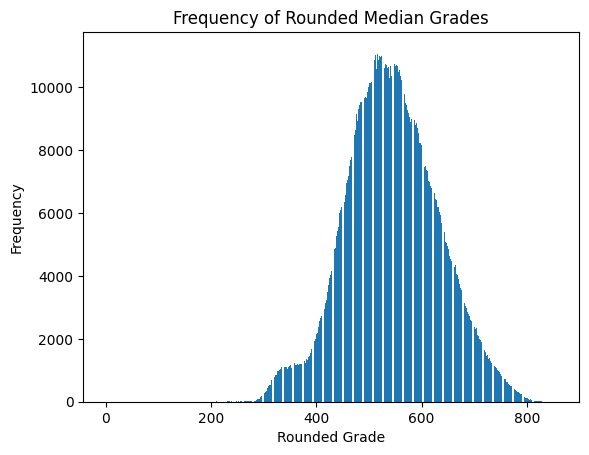

In [10]:
# Exibe a distribuição das notas médias

filtered_df = DF[DF['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

In [37]:
# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

Nota de corte do top 1%: 750.0
Nota de corte do top 25%: 602.0
Nota de corte do top 50%: 541.0
Nota de corte do top 75%: 485.0
Nota de corte do top 100%: 56.0


In [38]:
# Adiciona uma coluna com o valor categórico de acordo com a nota média

# A -> 1%
# B -> 2% - 25%
# C -> 26% - 50%
# D -> 51% - 75%
# E -> 76% - 100%

def map_num_grade_to_categorical(grade):
  if grade >= top_1_percent_grade:
    return 'A'
  elif grade >= top_25_percent_grade:
    return 'B'
  elif grade >= top_50_percent_grade:
    return 'C'
  elif grade >= top_75_percent_grade:
    return 'D'
  elif grade >= lowest_valid_grade:
    return 'E'
  else:
    return 'F'

DF['TP_NOTA_MEDIA'] = DF['NU_NOTA_MEDIA'].round().apply(map_num_grade_to_categorical)


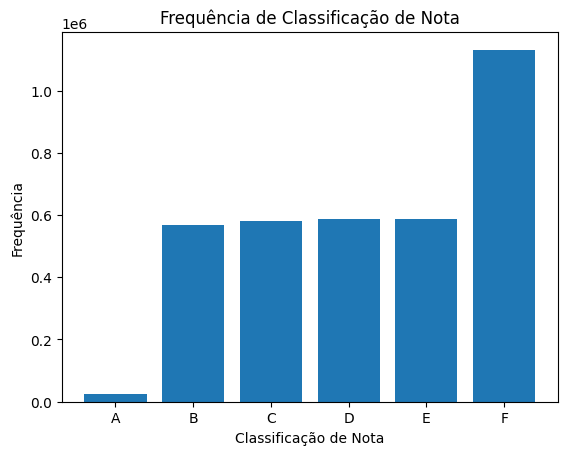

In [39]:
# Exibe a distribuição das classificações de notas

grade_counts = DF['TP_NOTA_MEDIA'].value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Classificação de Nota')
plt.ylabel('Frequência')
plt.title('Frequência de Classificação de Nota')

plt.show()

##**3. Data preparation (Preparação dos dados)**

##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.